## When i am reviewing the data preprocesing notes i have found a mistake in my code that is i taught of adding the number of items scold of a particular item from a particular shop. But i have calculated all the items of all the shops.

In [148]:
## import the data with pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('sales_train.csv')
data.drop(columns='date',inplace = True)

In [149]:
newddata = data.groupby(['date_block_num','shop_id','item_id'])['item_cnt_day'].sum()

In [151]:
newddata

date_block_num  shop_id  item_id
0               0        32          6
                         33          3
                         35          1
                         43          1
                         51          2
                                    ..
10              44       1810        2
                         1811        3
                         1830        2
                         1835        1
                         1855       10
Name: item_cnt_day, Length: 580581, dtype: int64

In [152]:
data  = pd.merge(data,newddata,on = ['date_block_num','shop_id','item_id'])

In [153]:
data

,date_block_num,shop_id,item_id,item_price,item_cnt_day_x,item_cnt_day_y
0,0,59,22154,999.00,1,1
1,0,25,2552,899.00,1,0
2,0,25,2552,899.00,-1,0
3,0,25,2554,1709.05,1,1
4,0,25,2555,1099.00,1,1
...,...,...,...,...,...,...
1048570,10,37,18474,199.00,1,2
1048571,10,37,18474,199.00,1,2
1048572,10,37,18484,199.00,1,1
1048573,10,37,19751,99.00,1,1


In [154]:
## I think now i am able to calculate the Total sales of particular item given the same shop id and same number

In [155]:
data.drop(columns='item_cnt_day_x',axis =1,inplace= True)

In [156]:
def multiplication(x):
    return x['item_price']*x['item_cnt_day_y']

In [157]:
data['TotalSales'] = data.apply(multiplication,axis = 1)

In [158]:
data

,date_block_num,shop_id,item_id,item_price,item_cnt_day_y,TotalSales
0,0,59,22154,999.00,1,999.00
1,0,25,2552,899.00,0,0.00
2,0,25,2552,899.00,0,0.00
3,0,25,2554,1709.05,1,1709.05
4,0,25,2555,1099.00,1,1099.00
...,...,...,...,...,...,...
1048570,10,37,18474,199.00,2,398.00
1048571,10,37,18474,199.00,2,398.00
1048572,10,37,18484,199.00,1,199.00
1048573,10,37,19751,99.00,1,99.00


In [162]:
data.drop_duplicates(inplace= True) ## ++++++++++++++++++++++++++++++++++ THis is my dataset. If you want to update do it from this data.

In [163]:
data

,date_block_num,shop_id,item_id,item_price,item_cnt_day_y,TotalSales
0,0,59,22154,999.00,1,999.00
1,0,25,2552,899.00,0,0.00
3,0,25,2554,1709.05,1,1709.05
4,0,25,2555,1099.00,1,1099.00
5,0,25,2564,349.00,1,349.00
...,...,...,...,...,...,...
1048569,10,37,18469,299.00,1,299.00
1048570,10,37,18474,199.00,2,398.00
1048572,10,37,18484,199.00,1,199.00
1048573,10,37,19751,99.00,1,99.00


In [44]:
data.corr()

,date_block_num,shop_id,item_id,item_price,item_cnt_day_y,TotalSales
date_block_num,1.000000,0.063909,0.011754,0.010885,0.054909,0.054853
shop_id,0.063909,1.000000,0.031114,-0.019261,0.005018,-0.010420
item_id,0.011754,0.031114,1.000000,-0.150763,0.057206,-0.092489
item_price,0.010885,-0.019261,-0.150763,1.000000,-0.004726,0.283332
item_cnt_day_y,0.054909,0.005018,0.057206,-0.004726,1.000000,0.345717
TotalSales,0.054853,-0.010420,-0.092489,0.283332,0.345717,1.000000


In [45]:
d = data.groupby('date_block_num')['TotalSales'].sum()

In [47]:
d = pd.DataFrame(d)

In [49]:
d.reset_index(inplace = True)

In [50]:
d

,date_block_num,TotalSales
0,0,4.250141e+08
1,1,4.264175e+08
2,2,5.917046e+08
3,3,2.877985e+08
4,4,2.675138e+08
5,5,4.071112e+08
6,6,3.270622e+08
7,7,3.121868e+08
8,8,7.639320e+08
9,9,7.799799e+08


In [51]:
d.corr()

,date_block_num,TotalSales
date_block_num,1.000000,0.101906
TotalSales,0.101906,1.000000


In [52]:
### d dataset is the total number of sales for a paricular month.

In [54]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [55]:
X = d.iloc[:,0:1].values

In [56]:
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [57]:
y = d.iloc[:,-1].values

In [58]:
y

array([4.25014144e+08, 4.26417481e+08, 5.91704610e+08, 2.87798515e+08,
       2.67513752e+08, 4.07111235e+08, 3.27062212e+08, 3.12186808e+08,
       7.63932000e+08, 7.79979941e+08, 1.53722426e+08])

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 132)

In [61]:
X_train

array([[ 4],
       [ 7],
       [ 5],
       [ 6],
       [ 8],
       [ 2],
       [10],
       [ 1]], dtype=int64)

In [62]:
X_test

array([[9],
       [0],
       [3]], dtype=int64)

In [63]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
y_pred = reg.predict(X_test)

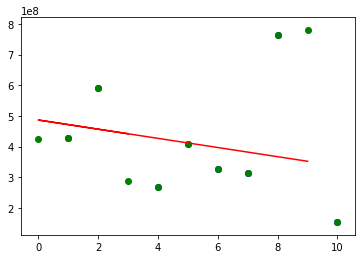

In [69]:
plt.scatter(X_train,y_train,color = 'blue')
plt.scatter(X,y,color = 'green')
plt.plot(X_test,y_pred,color = 'red')

In [70]:
reg.predict([[12]])

array([3.07147916e+08])

In [71]:
from sklearn.metrics import mean_squared_error,r2_score

In [74]:
int(mean_squared_error(y_test,y_pred))

70214586266993560

## If we see the graphs above we can say it has negtive scope that means sales are going to reduce. 
# Now the quetion raises why are the sales getting reduced.?????????? 

In [164]:
data

,date_block_num,shop_id,item_id,item_price,item_cnt_day_y,TotalSales
0,0,59,22154,999.00,1,999.00
1,0,25,2552,899.00,0,0.00
3,0,25,2554,1709.05,1,1709.05
4,0,25,2555,1099.00,1,1099.00
5,0,25,2564,349.00,1,349.00
...,...,...,...,...,...,...
1048569,10,37,18469,299.00,1,299.00
1048570,10,37,18474,199.00,2,398.00
1048572,10,37,18484,199.00,1,199.00
1048573,10,37,19751,99.00,1,99.00


## Now i am looking into why the sales have been reduced dratically in the last month of the year.

In [115]:
d2 = data.groupby('date_block_num')['shop_id'].unique()
d2

date_block_num
0     [59, 25, 24, 23, 19, 22, 18, 21, 28, 27, 29, 2...
1     [50, 47, 51, 52, 42, 46, 43, 54, 56, 59, 7, 53...
2     [5, 2, 41, 38, 44, 37, 35, 46, 42, 45, 31, 30,...
3     [25, 21, 23, 22, 24, 28, 27, 29, 26, 7, 16, 10...
4     [59, 27, 28, 26, 29, 30, 24, 21, 25, 22, 19, 4...
5     [30, 29, 31, 28, 44, 41, 45, 38, 46, 42, 32, 3...
6     [28, 27, 25, 26, 31, 35, 37, 32, 30, 29, 19, 1...
7     [57, 58, 54, 59, 46, 42, 43, 41, 44, 38, 45, 5...
8     [51, 50, 53, 54, 52, 43, 42, 46, 47, 57, 22, 1...
9     [44, 41, 45, 38, 37, 42, 43, 46, 3, 2, 4, 31, ...
10    [43, 28, 27, 29, 30, 26, 25, 35, 37, 31, 41, 3...
Name: shop_id, dtype: object

In [116]:
d2 = pd.DataFrame(d2)

In [117]:
d2.reset_index(inplace= True)

In [118]:
d2['number_of_shops'] = d2['shop_id'].apply(lambda x: len(x))
d2

,date_block_num,shop_id,number_of_shops
0,0,"[59, 25, 24, 23, 19, 22, 18, 21, 28, 27, 29, 2...",45
1,1,"[50, 47, 51, 52, 42, 46, 43, 54, 56, 59, 7, 53...",46
2,2,"[5, 2, 41, 38, 44, 37, 35, 46, 42, 45, 31, 30,...",46
3,3,"[25, 21, 23, 22, 24, 28, 27, 29, 26, 7, 16, 10...",46
4,4,"[59, 27, 28, 26, 29, 30, 24, 21, 25, 22, 19, 4...",45
5,5,"[30, 29, 31, 28, 44, 41, 45, 38, 46, 42, 32, 3...",46
6,6,"[28, 27, 25, 26, 31, 35, 37, 32, 30, 29, 19, 1...",46
7,7,"[57, 58, 54, 59, 46, 42, 43, 41, 44, 38, 45, 5...",45
8,8,"[51, 50, 53, 54, 52, 43, 42, 46, 47, 57, 22, 1...",45
9,9,"[44, 41, 45, 38, 37, 42, 43, 46, 3, 2, 4, 31, ...",46


In [119]:
d2.drop(columns='shop_id',inplace= True,axis =1)
d2

,date_block_num,number_of_shops
0,0,45
1,1,46
2,2,46
3,3,46
4,4,45
5,5,46
6,6,46
7,7,45
8,8,45
9,9,46


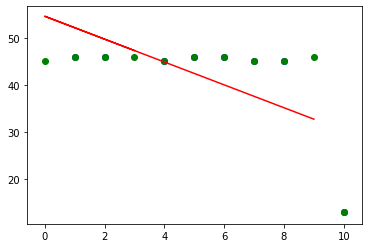

In [121]:
X1 = d2.iloc[:,0:1].values
y1 = d2.iloc[:,-1].values
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.2,random_state = 132)
reg3 = LinearRegression()
reg3.fit(X_train1,y_train1)
y_pred1 = reg3.predict(X_test1)
plt.scatter(X_train1,y_train1,color = 'blue')
plt.scatter(X1,y1,color = 'green')
plt.plot(X_test1,y_pred1,color = 'red')

## Now i can say that why the sales have been decresed. --- > As the number of shops count has decreased i can say there is reduce in total number of sales. 
## Unless you increase the count of shops --> there will be no increase in the total sales.

## why the count of number od shops have been reduced?? 

##  is the data insufficent ? ---> how to answer this quetion? This is so simple by looking at the date frames in the original data.

In [90]:
data

,date_block_num,shop_id,item_id,item_price,item_cnt_day_y,TotalSales
0,0,59,22154,999.00,1,999.00
1,0,25,2552,899.00,0,0.00
2,0,25,2552,899.00,0,0.00
3,0,25,2554,1709.05,1,1709.05
4,0,25,2555,1099.00,1,1099.00
...,...,...,...,...,...,...
1048570,10,37,18474,199.00,2,398.00
1048571,10,37,18474,199.00,2,398.00
1048572,10,37,18484,199.00,1,199.00
1048573,10,37,19751,99.00,1,99.00


In [123]:
d3 = data.groupby(['date_block_num','shop_id'])['item_id'].unique()

In [125]:
d3

date_block_num  shop_id
0               0          [11059, 11347, 11061, 11064, 11065, 11077, 110...
                1          [8070, 11415, 11435, 11441, 11450, 11454, 1146...
                2          [11330, 11331, 11332, 11015, 11030, 11041, 112...
                3          [13102, 12444, 12459, 12467, 12472, 12552, 131...
                4          [5605, 5587, 5588, 5613, 5627, 5629, 5643, 565...
                                                 ...                        
10              37         [1507, 1511, 1512, 1513, 1531, 1624, 1809, 151...
                38         [21623, 21624, 21655, 21675, 21732, 21767, 219...
                41         [4779, 4573, 4583, 4809, 4811, 4597, 4845, 461...
                43                                                    [4420]
                44         [972, 987, 1007, 1010, 1015, 1035, 1142, 1235,...
Name: item_id, Length: 469, dtype: object

In [127]:
d3 = pd.DataFrame(d3)
d3.reset_index(inplace= True)
d3

,index,date_block_num,shop_id,item_id
0,0,0,0,"[11059, 11347, 11061, 11064, 11065, 11077, 110..."
1,1,0,1,"[8070, 11415, 11435, 11441, 11450, 11454, 1146..."
2,2,0,2,"[11330, 11331, 11332, 11015, 11030, 11041, 112..."
3,3,0,3,"[13102, 12444, 12459, 12467, 12472, 12552, 131..."
4,4,0,4,"[5605, 5587, 5588, 5613, 5627, 5629, 5643, 565..."
...,...,...,...,...
464,464,10,37,"[1507, 1511, 1512, 1513, 1531, 1624, 1809, 151..."
465,465,10,38,"[21623, 21624, 21655, 21675, 21732, 21767, 219..."
466,466,10,41,"[4779, 4573, 4583, 4809, 4811, 4597, 4845, 461..."
467,467,10,43,[4420]


In [128]:
d3['number_of_items_per_shop_per_month'] = d3['item_id'].apply(lambda x: len(x))
d3

,index,date_block_num,shop_id,item_id,number_of_items_per_shop_per_month
0,0,0,0,"[11059, 11347, 11061, 11064, 11065, 11077, 110...",2385
1,1,0,1,"[8070, 11415, 11435, 11441, 11450, 11454, 1146...",1535
2,2,0,2,"[11330, 11331, 11332, 11015, 11030, 11041, 112...",728
3,3,0,3,"[13102, 12444, 12459, 12467, 12472, 12552, 131...",544
4,4,0,4,"[5605, 5587, 5588, 5613, 5627, 5629, 5643, 565...",1062
...,...,...,...,...,...
464,464,10,37,"[1507, 1511, 1512, 1513, 1531, 1624, 1809, 151...",237
465,465,10,38,"[21623, 21624, 21655, 21675, 21732, 21767, 219...",79
466,466,10,41,"[4779, 4573, 4583, 4809, 4811, 4597, 4845, 461...",943
467,467,10,43,[4420],1


In [130]:
d3.drop(columns = ['index','item_id'])

,date_block_num,shop_id,number_of_items_per_shop_per_month
0,0,0,2385
1,0,1,1535
2,0,2,728
3,0,3,544
4,0,4,1062
...,...,...,...
464,10,37,237
465,10,38,79
466,10,41,943
467,10,43,1


In [131]:
d3.corr()

,index,date_block_num,shop_id,number_of_items_per_shop_per_month
index,1.000000,0.995196,0.153599,-0.101886
date_block_num,0.995196,1.000000,0.058562,-0.127450
shop_id,0.153599,0.058562,1.000000,0.218296
number_of_items_per_shop_per_month,-0.101886,-0.127450,0.218296,1.000000


In [134]:
## actually the above data preprocessing is not good.

In [165]:
data

,date_block_num,shop_id,item_id,item_price,item_cnt_day_y,TotalSales
0,0,59,22154,999.00,1,999.00
1,0,25,2552,899.00,0,0.00
3,0,25,2554,1709.05,1,1709.05
4,0,25,2555,1099.00,1,1099.00
5,0,25,2564,349.00,1,349.00
...,...,...,...,...,...,...
1048569,10,37,18469,299.00,1,299.00
1048570,10,37,18474,199.00,2,398.00
1048572,10,37,18484,199.00,1,199.00
1048573,10,37,19751,99.00,1,99.00


In [136]:
## what i want to find out is whta kind/catergory of item is being scold by the shop_id

In [137]:
## To do item caterogry which is present in separate file, i am going you add that column in items.csv file to this dataset.

In [139]:
d4 = pd.read_csv('items.csv')

In [140]:
d4

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [168]:
datanew = data.copy()  ### I am making a copy of my original file

In [169]:
d5 = pd.merge(datanew,d4,on = 'item_id',how = 'left')

In [170]:
d5

,date_block_num,shop_id,item_id,item_price,item_cnt_day_y,TotalSales,item_name,item_category_id
0,0,59,22154,999.00,1,999.00,ЯВЛЕНИЕ 2012 (BD),37
1,0,25,2552,899.00,0,0.00,DEEP PURPLE The House Of Blue Light LP,58
2,0,25,2554,1709.05,1,1709.05,DEEP PURPLE Who Do You Think We Are LP,58
3,0,25,2555,1099.00,1,1099.00,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
4,0,25,2564,349.00,1,349.00,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59
...,...,...,...,...,...,...,...,...
621254,10,37,18469,299.00,1,299.00,СБ. Танцевальный марафон (mp3-CD) (jewel),57
621255,10,37,18474,199.00,2,398.00,СБ. Танцевальный рай 31,55
621256,10,37,18484,199.00,1,199.00,СБ. Танцевальный рай The Best 90`s,55
621257,10,37,19751,99.00,1,99.00,ТОР (регион),40
